In [38]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("/home/amol/GITRepo/GL/Residency-4-UnsupervisedLer/Session-1/shopping_data.csv")

In [4]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df = df.rename(columns={"Annual Income (k$)" : "Income", "Spending Score (1-100)":"Score"})
df= df.drop("Age", axis =1)
df = df.drop("CustomerID", axis=1)
df= df.drop("Genre", axis=1)

In [7]:
feature_names = df.columns

In [8]:
feature_names

Index(['Income', 'Score'], dtype='object')

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
sc = StandardScaler()

In [12]:
df_normal = pd.DataFrame(sc.fit_transform(df))

In [13]:
df_normal.columns = feature_names

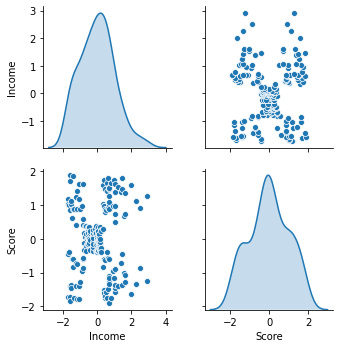

In [14]:
sns.pairplot(df_normal,diag_kind='kde')

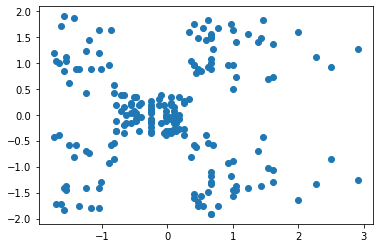

In [15]:
plt.scatter(df_normal.Income,df_normal.Score)

In [17]:
import numpy as np

In [18]:

f1 = df_normal['Income'].values

f2= df_normal['Score'].values

X = np.array(list(zip(f1, f2)))

In [19]:
from sklearn.cluster import KMeans

In [20]:
cluster_range = range(2,7)
clusetr_errors = []
cluster_sil_scores = []

In [21]:
    num_clusters = 5
    clusters = KMeans(num_clusters, n_init=5)
    clusters.fit(X)    
    

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=5, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [22]:
print (clusters.labels_)

[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 2 0 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 3 1 2 1 3 1 3 1 2 1 3 1 3 1 3 1 3 1 2 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [23]:
print(clusters.cluster_centers_)

[[-1.30751869 -1.13696536]
 [ 0.99158305  1.23950275]
 [-0.20091257 -0.02645617]
 [ 1.05500302 -1.28443907]
 [-1.32954532  1.13217788]]


In [24]:
sc.inverse_transform(clusters.cluster_centers_)

array([[26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636]])

In [25]:
labels = clusters.predict(X)

In [26]:
type(labels)

numpy.ndarray

In [27]:
clusters.labels_.shape

(200,)

In [28]:
colnames = ["Income","Score"]

In [29]:
df_new = pd.DataFrame(X, columns=colnames)

In [30]:
df_new["Group"] = labels

In [31]:
df_new

,Income,Score,Group
0,-1.738999,-0.434801,0
1,-1.738999,1.195704,4
2,-1.700830,-1.715913,0
3,-1.700830,1.040418,4
4,-1.662660,-0.395980,0
...,...,...,...
195,2.268791,1.118061,1
196,2.497807,-0.861839,3
197,2.497807,0.923953,1
198,2.917671,-1.250054,3


In [33]:
df["Group"] = labels

/home/amol/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/amol/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/amol/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/amol/anaconda3/lib/python3.7/site-package

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2a280d97d0>,
      dtype=object)

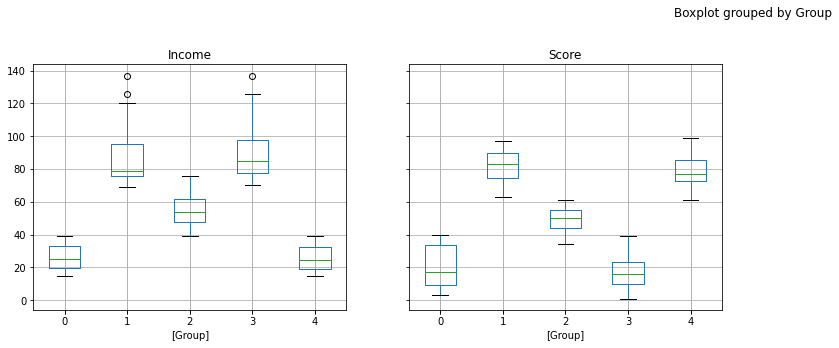

In [34]:
df.boxplot(by = 'Group',  layout=(2,4), figsize=(25, 10))

/home/amol/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/amol/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/amol/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/amol/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/amol/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/amol/anaconda3/lib/py

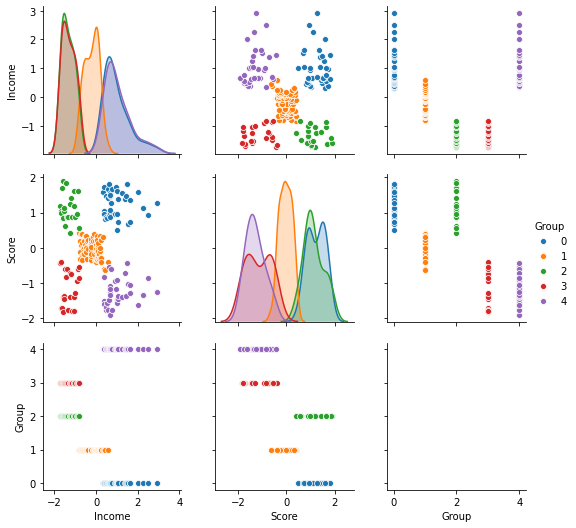

In [168]:
sns.pairplot(df_new,hue="Group",diag_kind="kde")

In [178]:
cluster_range = range(2,10)
clusetr_errors = []
cluster_sil_scores = []

In [179]:
for cluster_num in cluster_range :
    model = KMeans(cluster_num, n_init=5)
    model.fit(X) 
    labels = model.labels_
    centroids = sc.inverse_transform(model.cluster_centers_)
    clusetr_errors.append(model.inertia_)

In [180]:
cluster_df = pd.DataFrame({"ClusterNo" :cluster_range, "ClusterError" :clusetr_errors })

In [181]:
cluster_df

,ClusterNo,ClusterError
0,2,270.668205
1,3,157.704008
2,4,108.921317
3,5,65.568408
4,6,55.057348
5,7,44.911186
6,8,37.243212
7,9,32.360230


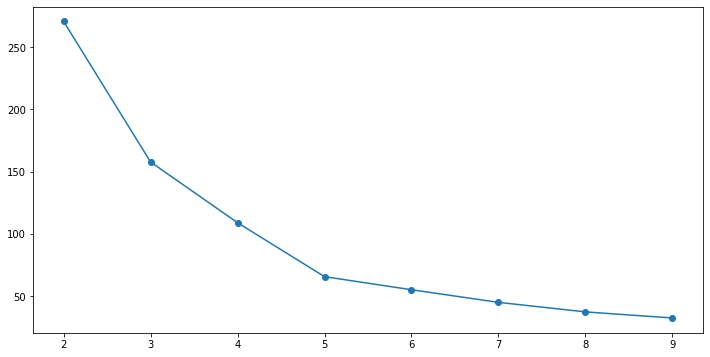

In [182]:
plt.figure(figsize=(12,6))
plt.plot( cluster_df.ClusterNo, cluster_df.ClusterError, marker = "o" )

In [125]:
cluster_range = range( 2, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(X)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  


# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,183653.328947
1,3,106348.373062
2,4,73679.789039
3,5,44448.455448
4,6,37265.865205
5,7,30241.343618
6,8,25022.485005
7,9,22787.737044


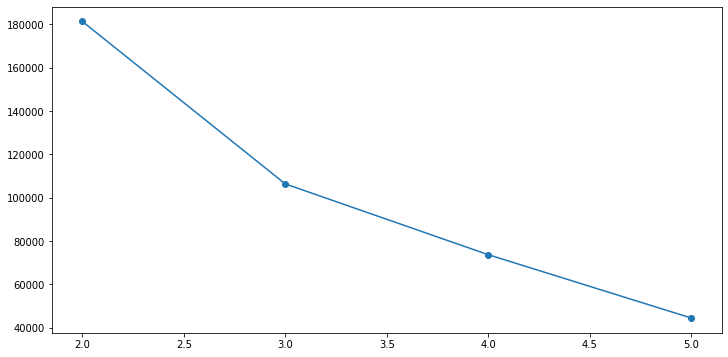

In [32]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [129]:
clusters = KMeans(5, n_init = 5)